  0%|                                                                                          | 0/328 [00:00<?, ?it/s]

['.git', 'datasets', 'lr_utils.py', 'main.py', 'New Text Document.txt', 'test', 'train', 'val']


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 51.09it/s]


(656,)
(38,)
694
X shape:  (694, 128, 128)
Y shape:  (694, 1)
X train flatten (589, 16384)
X test flatten (105, 16384)
x train:  (16384, 589)
x test:  (16384, 105)
y train:  (1, 589)
y test:  (1, 105)
Cost after iteration 0: nan
Cost after iteration 100: 2.053069
Cost after iteration 200: 1.611476
Cost after iteration 300: 1.386993
Cost after iteration 400: 1.225446
Cost after iteration 500: 1.094306
Cost after iteration 600: 0.978736
Cost after iteration 700: 0.869639
Cost after iteration 800: 0.760888
Cost after iteration 900: 0.643538
Cost after iteration 1000: 0.175639
Cost after iteration 1100: 1.049811
Cost after iteration 1200: 0.122867
Cost after iteration 1300: 0.103413
Cost after iteration 1400: 0.093621


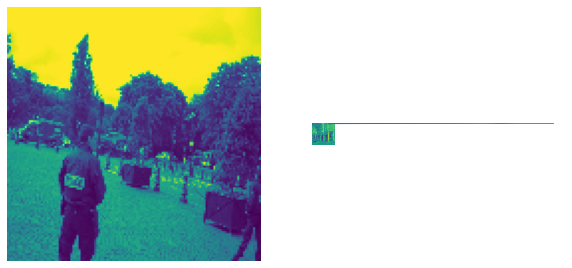

Test Accuracy: 64.76 %
Train Accuracy: 98.98 %


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2 
import os 
from shutil import copy
from random import shuffle 
from tqdm import tqdm 
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("G:/ambu1"))


train_ambulance = "G:/ambu1/train/ambulance" 
train_car= "G:/ambu1/train/car"
test_ambulance= "G:/ambu1/test/ambulance"
test_car= "G:/ambu1/test/car"
image_size = 128


for image in tqdm(os.listdir(train_ambulance)): 
    try:
        path = os.path.join(train_ambulance, image)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img = cv2.resize(img, (image_size, image_size)).flatten()   
        np_img=np.asarray(img)
    except Exception as e:
        print(str(e))
    
for image2 in tqdm(os.listdir(train_car)): 
    try:
        path = os.path.join(train_car, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size)).flatten() 
        np_img2=np.asarray(img2)
    except Exception as e:
        print(str(e))

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(image_size, image_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size))
plt.axis('off')
plt.title("")

def train_data():
    train_data_ambulance = [] 
    train_data_car=[]
    for image1 in tqdm(os.listdir(train_ambulance)): 
        try:
            path = os.path.join(train_ambulance, image1)
            img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
            img1 = cv2.resize(img1, (image_size, image_size))
            train_data_ambulance.append(img1) 
        except Exception as e:
            print(str(e))
    for image2 in tqdm(os.listdir(train_car)): 
        try:
            path = os.path.join(train_car, image2)
            img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
            img2 = cv2.resize(img2, (image_size, image_size))
            train_data_car.append(img2) 
        except Exception as e:
            print(str(e))
    
    train_data= np.concatenate((np.asarray(train_data_ambulance),np.asarray(train_data_car)),axis=0)
    return train_data 

def test_data():
    test_data_ambulance = [] 
    test_data_car=[]
    for image1 in tqdm(os.listdir(test_ambulance)): 
       try:
            path = os.path.join(test_ambulance, image1)
            img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
            img1 = cv2.resize(img1, (image_size, image_size))
            test_data_ambulance.append(img1) 

       except Exception as e:
            print(str(e))

    for image2 in tqdm(os.listdir(test_car)): 
        try:
            path = os.path.join(test_car, image2)
            img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
            img2 = cv2.resize(img2, (image_size, image_size))
            test_data_car.append(img2) 
        except Exception as e:
            print(str(e))
    
    test_data= np.concatenate((np.asarray(test_data_ambulance),np.asarray(test_data_car)),axis=0) 
    return test_data 

train_data = train_data() 
test_data = test_data()

x_data=np.concatenate((train_data,test_data),axis=0)
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))


z1 = np.zeros(328)
o1 = np.ones(328)
Y_train = np.concatenate((o1, z1), axis=0)
z = np.zeros(19)
o = np.ones(19)
Y_test = np.concatenate((o, z), axis=0)

print(Y_train.shape)
print(Y_test.shape)
print(x_data.shape[0])

y_data=np.concatenate((Y_train,Y_test),axis=0).reshape(x_data.shape[0],1)

print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_test = y_test.T
y_train = y_train.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iterarion):
        
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 100 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

def predict(w,b,x_test):
    
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):

    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    
    print("Test Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100,2)))
    print("Train Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100,2)))

logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 1500)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7),"penalty":["l1","l2"]},
logistic_regression=LogisticRegression(random_state=42)
log_reg_cv=GridSearchCV(logistic_regression,grid,cv=10)
log_reg_cv.fit(x_train.T,y_train.T)

print("best hyperparameters: ", log_reg_cv.best_params_)
print("accuracy: ", log_reg_cv.best_score_)


print(log_reg.predict(x_test[:4]))

print(log_ref.predict_classes(x_train[:4]))

y_test[:4]

log_reg= LogisticRegression(C=1,penalty="l1")
log_reg.fit(x_train.T,y_train.T)
print("test accuracy: {} ".format(log_reg.fit(x_test.T, y_test.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(log_reg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))







In [1]:
print(w)

NameError: name 'w' is not defined